In [89]:
#importing the dependencies 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_csv('data1.csv',sep=';')

In [91]:
df.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [92]:
df.shape

(3333, 20)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [94]:
print('From the dataset we can observe that there are no null values ')

From the dataset we can observe that there are no null values 


In [95]:
print("Now i will be changing datatypes ")

Now i will be changing datatypes 


In [96]:
df['location code'].unique()

array([415, 408, 510], dtype=int64)

In [97]:
df['location code']=df['location code'].astype(str)

In [98]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [99]:
def list_columns(df): 
  '''
  Input: a dataframe 
  Output: list of categorical columns and numerical columns 
  '''
  cat_cols = ['categorical']
  num_cols = ['numerical']

  for col in df.columns:
    if df[col].dtype == 'object':
      cat_cols.append(col)
    else:
      num_cols.append(col)
  
  return (cat_cols, num_cols)

In [100]:
list_columns(df)

(['categorical',
  'location code',
  'credit card info save',
  'push status',
  'avg order value',
  'discount rate per visited products',
  'product detail view per app session',
  'add to cart per session'],
 ['numerical',
  'account length',
  'user id',
  'add to wishlist',
  'desktop sessions',
  'app sessions',
  'desktop transactions',
  'total product detail views',
  'session duration',
  'promotion clicks',
  'sale product views',
  'app transactions',
  'customer service calls',
  'churn'])

In [101]:
df['credit card info save'].unique()

array(['no', 'yes'], dtype=object)

In [102]:
df['credit card info save']=df['credit card info save'].map({'yes':1,'no':0})

In [103]:
df['push status']=df['push status'].map({'yes':1,'no':0})

In [104]:
df['avg order value']=df['avg order value'].str.replace(",",'.').astype(float)

In [105]:
df['avg order value']

0       244.7
1       254.4
2       162.6
3       196.9
4       186.9
        ...  
3328    279.1
3329    191.3
3330    191.9
3331    139.2
3332    241.4
Name: avg order value, Length: 3333, dtype: float64

In [106]:
##df['avg order value']=df['avg order value'].str.replace(",",'.').astype(float)
df['discount rate per visited products']=df['discount rate per visited products'].str.replace(",",'.').astype(float)
df['product detail view per app session']=df['product detail view per app session'].str.replace(",",'.').astype(float)
df['add to cart per session']=df['add to cart per session'].str.replace(",",'.').astype(float)

In [111]:
df_cat=pd.get_dummies(df['location code'])

In [107]:
df.drop(columns=['user id'],inplace=True)

In [121]:
df_m=pd.concat([df,df_cat],axis=1)

# Scaling the data 

In [122]:
def normalize_features(data):
    data_mean = data.mean()
    data_std = data.std()
    data_normalized = (data - data_mean)/data_std
    return data_normalized

In [123]:
## Creating The numerical dataframe 

In [124]:
df_num=df.select_dtypes(include=np.number)

In [125]:
df_num

,account length,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,0,1,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156,27,18,77,216,126,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231,39,13,57,153,55,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,181,31,25,109,289,58,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,214,36,14,105,160,84,139.2,137,6.26,5.0,10,1.35,2,0


In [127]:
norm_df=normalize_features(df_num)

In [131]:
df_main=pd.concat([norm_df,df_cat],axis=1)

In [132]:
df_main

,account length,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,...,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,408,415,510
0,0.676388,-0.327531,1.616843,1.234697,1.564315,1.556960,-0.020262,0.476572,-0.079654,-0.658039,...,-0.465425,0.865899,-0.084995,-0.601105,-0.085678,-0.427868,-0.41161,0,1,0
1,0.149043,-0.327531,1.616843,1.307752,-0.327081,-0.384919,-0.020262,1.124334,-0.099372,0.145016,...,0.147802,1.059231,1.240296,-0.601105,1.240982,-0.427868,-0.41161,0,1,0
2,0.902393,-0.327531,-0.618303,-0.591671,1.160328,1.125431,-1.639210,0.675883,-1.578243,0.496353,...,0.198905,-0.755457,0.703015,0.211502,0.697052,-1.188040,-0.41161,0,1,0
3,-0.428526,3.052227,-0.618303,-0.591671,2.188659,2.204252,-2.795602,-1.466716,-2.741622,-0.607848,...,-0.567629,-0.078794,-1.302831,1.024109,-1.306205,0.332305,-0.41161,1,0,0
4,-0.654531,3.052227,-0.618303,-0.591671,-0.235265,-0.277037,-0.945375,0.626055,-1.045850,1.098644,...,1.067643,-0.276520,-0.049177,-0.601105,-0.045878,1.092477,-0.41161,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283536,-0.327531,1.616843,2.038300,-0.437259,-0.384919,0.211016,-1.167749,0.294993,1.299408,...,-0.874243,1.546956,-0.120814,0.617806,-0.125477,0.332305,-0.41161,0,1,0
3329,-0.830313,-0.327531,-0.618303,-0.591671,0.939971,0.909667,-0.945375,-2.164306,-0.947258,-2.264149,...,1.169848,-0.188642,-0.228270,-0.194801,-0.231610,1.092477,-0.41161,0,1,0
3330,-1.834780,-0.327531,-0.618303,-0.591671,0.021818,0.046610,1.829964,0.426744,1.734428,-2.113577,...,-0.465425,-0.175460,1.383570,0.617806,1.386915,0.332305,-0.41161,0,0,1
3331,2.082642,3.052227,-0.618303,-0.591671,0.627799,0.586020,-0.714097,0.227432,-0.809230,-0.808612,...,1.885279,-1.221213,-1.875929,2.243020,-1.876669,0.332305,-0.41161,0,0,1


In [133]:
df_main.drop(columns='churn',inplace=True)

In [136]:
X=df_main

In [137]:
y=df['churn']

In [194]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [139]:
## Performing train test splitting 

def train_test_split(data, test_size):
  # Shuffle data
  np.random.shuffle(data)

  # Split data into train and test
  split = np.floor(test_size * len(data))
  train = data[split:]
  test = data[:split]

  # Return train, test
  return train, test

In [140]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
print ("The shape of the training set looks like",X_train.shape)

The shape of the training set looks like (2666, 20)


In [148]:
print ("The shape of the testing set looks like",X_test.shape)

The shape of the testing set looks like (667, 20)


# Building the Model 

In [169]:
#import necessary modules
def Random_Forest_Classification(X, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    preds=clf.predict(X_test)
    acc=accuracy_score(y_test,preds)
    return acc
    return clf


In [173]:
Acc=Random_Forest_Classification(X_train, y_train)

In [187]:
print ("Model accuracy for the Base model is : ", round(Acc,2)*100)

Model accuracy for the Base model is :  95.0


# # Performing Hyper Parameter Tuning 

In [176]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_iter = 10, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] 

In [180]:
from sklearn.metrics import accuracy_score
clf1 = RandomForestClassifier(n_estimators=200, random_state=0,min_samples_split=10,min_samples_leaf= 3,max_features= 3,max_depth= 80,bootstrap= True)
clf1.fit(X_train, y_train)
preds=clf1.predict(X_test)
acc=accuracy_score(y_test,preds)

In [186]:
print ("Model accuracy for the Tuned model is : ", round(acc,2)*100)

Model accuracy for the Tuned model is :  94.0


Text(0.5, 257.44, 'Predicted label')

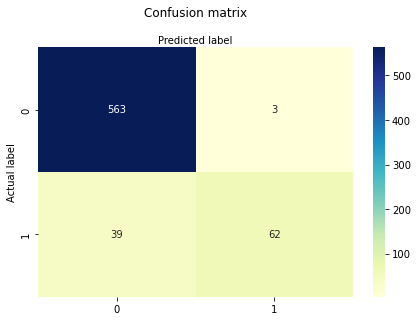

In [192]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix

true_labels = y_test
predicted_labels = preds

conf_mat = confusion_matrix(true_labels, predicted_labels)

classes=[0,1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [197]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score

y_true = y_test
y_pred = preds

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate sensitivity
sensitivity = roc_auc_score(y_true, y_pred)

print("Recall: ", round(recall,2))
print("Precision: ", round(precision,2))
print("Accuracy: ", round(accuracy,2))
print("Sensitivity: ", round(sensitivity,2))

Recall:  0.61
Precision:  0.95
Accuracy:  0.94
Sensitivity:  0.8
